In [31]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


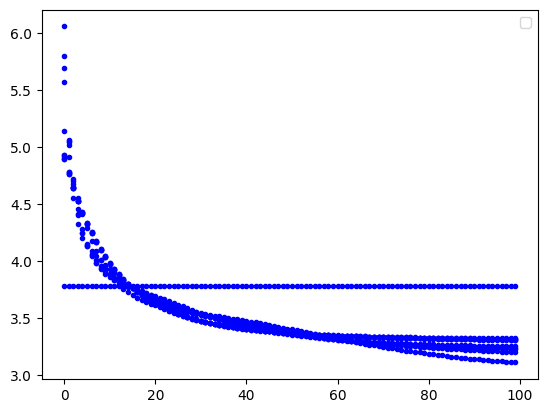

In [32]:
base_dir = Path("../data_out/finn_different_seeds")

fig, ax = plt.subplots()

for d in base_dir.iterdir():
    try:
        path = d / "predicted_retardations/retPred_100.npy"
        # print(path)
        ret = np.load(path)
    except FileNotFoundError:
        # print(f"File not found: {d}")
        continue
    # Continue if any NaNs or Infs are found
    if np.any(np.isnan(ret)) or np.any(np.isinf(ret)):
        continue
    if np.any(ret > 100):
        continue
    ax.plot(ret, "b.")
    # ax.plot(ret, label=d.name)

plt.legend()
plt.show()